## SQL Joins
A JOIN clause combines rows from two or more tables based on related column(s) between
them. The SQL language offers many different types of joins. Note that not all types of JOIN
are implemented by the database engines.
- INNER JOIN: Select rows that have matching values in both tables based on the given
columns
- NATURAL JOIN: Similar to INNER JOIN except that there is no need to specify which
columns are used for matching values
- OUTER JOIN: Unlike INNER JOIN, unmatched rows in one or both tables can be
returned. There are LEFT, RIGHT and FULL OUTER JOIN. SQLite only supports LEFT
OUTER JOIN. For LEFT OUTER JOIN, all the records from the left table are included in
the result.
- CROSS JOIN: Return the Cartesian product of the two joined tables, by matching all
the values from the left table with all the values from the right table.

#### Combinations of INNER JOIN

In [17]:
%%sql
--1)Inner Join via cross join
-- we get the records about students who took the course with course ID ST101, but we also sort the student names in alphabetical order

select *
from Grade , Student
where Grade.course_id = 'ST101' and Student.student_id=Grade.student_id
order by Student.name


,course_id,student_id,final_mark,student_id.1,name,year
0,ST101,201921323,78,201921323,Ava Smith,2
1,ST101,202003219,47,202003219,Charlie Jones,1
2,ST101,201985603,60,201985603,Emily Wood,1


In [2]:
%%sql
--2)Inner Join using join
select *
from Student join Grade on Student.student_id = Grade.student_id
where course_id= 'ST101'
order by Student.name;

,student_id,name,year,course_id,student_id.1,final_mark
0,201921323,Ava Smith,2,ST101,201921323,78
1,202003219,Charlie Jones,1,ST101,202003219,47
2,201985603,Emily Wood,1,ST101,201985603,60


##### Very Clean JOIN Approach
by USING()
You can use USING with:
- INNER JOIN
- LEFT JOIN
- RIGHT JOIN
- FULL OUTER JOIN (if supported by your SQL dialect)

In [3]:
%%sql
--3)INNER join via USING()
select *
from Student join Grade USING(student_id)
where course_id = 'ST101'
order by Student.name;

,student_id,name,year,course_id,final_mark
0,201921323,Ava Smith,2,ST101,78
1,202003219,Charlie Jones,1,ST101,47
2,201985603,Emily Wood,1,ST101,60


In [4]:
%%sql
--4) INNER JOIN via NATURAL JOIN
select *
From Student NATURAL JOIN Grade
WHERE course_id= 'ST101'
ORDER BY Student.name;


,student_id,name,year,course_id,final_mark
0,201921323,Ava Smith,2,ST101,78
1,202003219,Charlie Jones,1,ST101,47
2,201985603,Emily Wood,1,ST101,60


#### Combinations of LEFT & RIGHT JOIN


In [5]:
%%sql
select *
from Student, Grade;

,student_id,name,year,course_id,student_id.1,final_mark
0,201921323,Ava Smith,2,ST101,201921323,78
1,201921323,Ava Smith,2,ST101,201985603,60
2,201921323,Ava Smith,2,ST101,202003219,47
3,201921323,Ava Smith,2,ST115,201921323,92
4,201921323,Ava Smith,2,ST115,202003219,67
5,201921323,Ava Smith,2,ST115,201933222,88
6,201921323,Ava Smith,2,ST207,201933222,73
7,201921323,Ava Smith,2,ST207,201875940,60
8,201832220,Ben Johnson,3,ST101,201921323,78
9,201832220,Ben Johnson,3,ST101,201985603,60


In [6]:
%%sql
--This will return the inner join
select *
From Student INNER JOIN Grade USING(student_id)
ORDER BY Student.name;

,student_id,name,year,course_id,final_mark
0,201921323,Ava Smith,2,ST101,78
1,201921323,Ava Smith,2,ST115,92
2,202003219,Charlie Jones,1,ST101,47
3,202003219,Charlie Jones,1,ST115,67
4,201985603,Emily Wood,1,ST101,60
5,201933222,Freddie Harris,2,ST115,88
6,201933222,Freddie Harris,2,ST207,73
7,201875940,Grace Clarke,2,ST207,60


In [7]:
%%sql
--The ones that are not shown through inner join are extracted using LEFT JOIN
--• All the students from the left table Student are included (including Ben Johnson and Dan Norris)
--• The students with no corresponding record in the right table Grade, have NULL value in attributes course_id and final_mark from Grade

--In other words, all rows in table Student are included in the result set whether there are matching rows in table Grade or not.

SELECT *
FROM Student LEFT JOIN Grade USING(student_id)
order by Student.name;

,student_id,name,year,course_id,final_mark
0,202045234,Dan Norris,1,NaN,NaN
1,201921323,Ava Smith,2,ST101,78.0
2,201921323,Ava Smith,2,ST115,92.0
3,201832220,Ben Johnson,3,NaN,NaN
4,202003219,Charlie Jones,1,ST101,47.0
5,202003219,Charlie Jones,1,ST115,67.0
6,201985603,Emily Wood,1,ST101,60.0
7,201933222,Freddie Harris,2,ST115,88.0
8,201933222,Freddie Harris,2,ST207,73.0
9,201875940,Grace Clarke,2,ST207,60.0


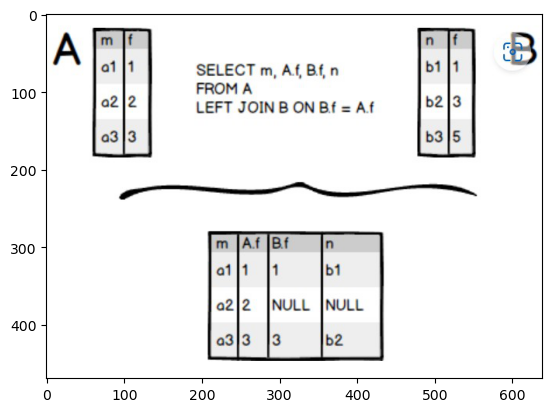

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('LEFT_JOIN.jpg')
plt.imshow(img)
plt.axis('on')  # Hide axes for better visualization
plt.show()

In [9]:
%%sql
--Cross JOIN
select *
from Student Cross Join Grade
order by Student.name;

,student_id,name,year,course_id,student_id.1,final_mark
0,202045234,Dan Norris,1,ST101,201921323,78
1,202045234,Dan Norris,1,ST101,201985603,60
2,202045234,Dan Norris,1,ST101,202003219,47
3,202045234,Dan Norris,1,ST115,201921323,92
4,202045234,Dan Norris,1,ST115,202003219,67
5,202045234,Dan Norris,1,ST115,201933222,88
6,202045234,Dan Norris,1,ST207,201933222,73
7,202045234,Dan Norris,1,ST207,201875940,60
8,201921323,Ava Smith,2,ST101,201921323,78
9,201921323,Ava Smith,2,ST101,201985603,60


## Using Python to create and manipulate databases

In [18]:
#connecting to DB using Python
import os
try:
    os.remove('University.db')
except OSError:
    pass
#make sure we run the notebook multiple times without errors
#prepares a SQLite database file for use and is a cleanup step. It ensures that if you're running the notebook or script multiple times (e.g., during development or testing), you start with a fresh database file each time

In [1]:
import sqlite3
conn = sqlite3.connect('University.db')

In [108]:
#creating tables using python
import pandas as pd


In [109]:
student = pd.read_csv('student.csv')

In [110]:
course = pd.read_csv('course.csv')

In [111]:
grade = pd.read_csv('grade.csv')

In [112]:
# write record stored in dataframes as tables to the database university.db using to_Sql()
# index = false to ensure the DF row index is not written into the SQL tables

student.to_sql('student', con = conn, index= False, if_exists='replace')
course.to_sql('course', con = conn, index= False, if_exists='replace')
grade.to_sql('grade', con = conn, index= False, if_exists='replace')

8

In [113]:
#manipulate DB using Python
#first create a cursor object
c = conn.cursor()

In [114]:
# execute()	Runs a SQL command and stores it
# fetchall() Retrieves all rows from a result

In [115]:
c.execute('''
Select name
from sqlite_master
where type='table'
''')

In [116]:
c.fetchall()

[('student',), ('course',), ('grade',)]

In [117]:
#we can browse each table using pandas
q = c.execute("select * from student").fetchall()
pd.DataFrame(q)

,0,1,2
0,201921323,Ava Smith,2
1,201832220,Ben Johnson,3
2,202003219,Charlie Jones,1
3,202045234,Dan Norris,1
4,201985603,Emily Wood,1
5,201933222,Freddie Harris,2
6,201875940,Grace Clarke,2


In [118]:
#we can add another table to the DB using
c.execute('''
create table Teacher (staff_id TEXT PRIMARY KEY, name TEXT)
''')


In [119]:
conn.commit() #Saves the changes

In [120]:
c.execute('''
select name
from sqlite_master
where type='table'
''').fetchall()

[('student',), ('course',), ('grade',), ('Teacher',)]

In [121]:
#Delete a Table
c.execute("DROP TABLE Teacher")

In [122]:
conn.commit()

In [123]:
c.execute('''
select name
from sqlite_master
where type='table'
''').fetchall()

[('student',), ('course',), ('grade',)]

In [124]:
#insert a tuple or row
c.execute("Insert into Student values(202029744,'Harper Taylor',1);")

In [125]:

conn.commit()

In [126]:
#broswe the table
q = c.execute("select * from Student").fetchall()
pd.DataFrame(q)

,0,1,2
0,201921323,Ava Smith,2
1,201832220,Ben Johnson,3
2,202003219,Charlie Jones,1
3,202045234,Dan Norris,1
4,201985603,Emily Wood,1
5,201933222,Freddie Harris,2
6,201875940,Grace Clarke,2
7,202029744,Harper Taylor,1


In [127]:
#update a row
c.execute('''
update Student
set student_id = '201929744'
where name = 'Harper Taylor'
''')

In [128]:
conn.commit()

In [129]:
q = c.execute("select * from Student").fetchall()
pd.DataFrame(q)

,0,1,2
0,201921323,Ava Smith,2
1,201832220,Ben Johnson,3
2,202003219,Charlie Jones,1
3,202045234,Dan Norris,1
4,201985603,Emily Wood,1
5,201933222,Freddie Harris,2
6,201875940,Grace Clarke,2
7,201929744,Harper Taylor,1


In [130]:
#delete  a row
c.execute('''
delete from student
where name = 'Harper Taylor'
''')

In [131]:
conn.commit()

In [132]:
q = c.execute("select * from Student").fetchall()
pd.DataFrame(q)

,0,1,2
0,201921323,Ava Smith,2
1,201832220,Ben Johnson,3
2,202003219,Charlie Jones,1
3,202045234,Dan Norris,1
4,201985603,Emily Wood,1
5,201933222,Freddie Harris,2
6,201875940,Grace Clarke,2


In [133]:
conn.close()

In [134]:
import sqlite3

In [135]:
conn1 = sqlite3.connect('University.db')

In [136]:
c1=conn1.cursor()

In [137]:
c1.execute("select name from sqlite_master where type='table'").fetchall()

[('student',), ('course',), ('grade',)]

In [138]:
#Example 1: get grades of the course 'course_id ST101'

q2 = c1.execute('''
Select final_mark
 from grade
Where course_id = 'ST101'
''').fetchall()

pd.DataFrame(q2)

,0
0,78
1,60
2,47


In [139]:
#Example 2: Get names of students in alpha order
q3 = c1.execute('''
Select Student.name
from Grade, Student
where Grade.course_id = 'ST101' and Student.student_id = Grade.student_id
order by name
''').fetchall()

pd.DataFrame(q3)

,0
0,Ava Smith
1,Charlie Jones
2,Emily Wood


In [140]:
#Example 3: Get courses taken by Ava Smith or Freddie Harris

q4 = c1.execute('''
Select DISTINCT course.name
from grade , student , course
where (student.name = 'Ava Smith' OR student.name = 'Freddie Harris') AND student.student_id = grade.student_id AND course.course_id=grade.course_id
''').fetchall()

pd.DataFrame(q4)

,0
0,programming for data science
1,Managing and Visualising Data
2,Databases


### Inspecting and solving the issue of the course table structure by applying if exists = replace

In [141]:
# inspect the schema
tables = c1.execute("SELECT name FROM sqlite_master WHERE type='table'").fetchall()

# Loop through each table and print its schema
for table_name in tables:
    table = table_name[0]

    print(f"\nSchema for table: {table}")
    schema = c1.execute(f"PRAGMA table_info({table})").fetchall()
    for column in schema:
        print(column)



Schema for table: student
(0, 'student_id', 'INTEGER', 0, None, 0)
(1, 'name', 'TEXT', 0, None, 0)
(2, 'year', 'INTEGER', 0, None, 0)

Schema for table: course
(0, 'course_id', 'TEXT', 0, None, 0)
(1, 'name', 'TEXT', 0, None, 0)
(2, 'capacity', 'INTEGER', 0, None, 0)

Schema for table: grade
(0, 'course_id', 'TEXT', 0, None, 0)
(1, 'student_id', 'INTEGER', 0, None, 0)
(2, 'final_mark', 'INTEGER', 0, None, 0)


In [142]:
q5 = c1.execute('''
Select * from course;
''')

pd.DataFrame(q5)

,0,1,2
0,ST101,programming for data science,60
1,ST115,Managing and Visualising Data,60
2,ST207,Databases,30
3,ST310,Machine Learning,100


In [156]:
#Example 4: Calculate the AVG mark for each course

q6 = c1.execute('''
Select course_id ,round(avg(final_mark),3) from grade
group by course_id;

''').fetchall()
pd.DataFrame(q6)

,0,1
0,ST101,61.7
1,ST115,82.3
2,ST207,66.5
